In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier

sns.set()

In [2]:
df = pd.read_csv('Churn Modeling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


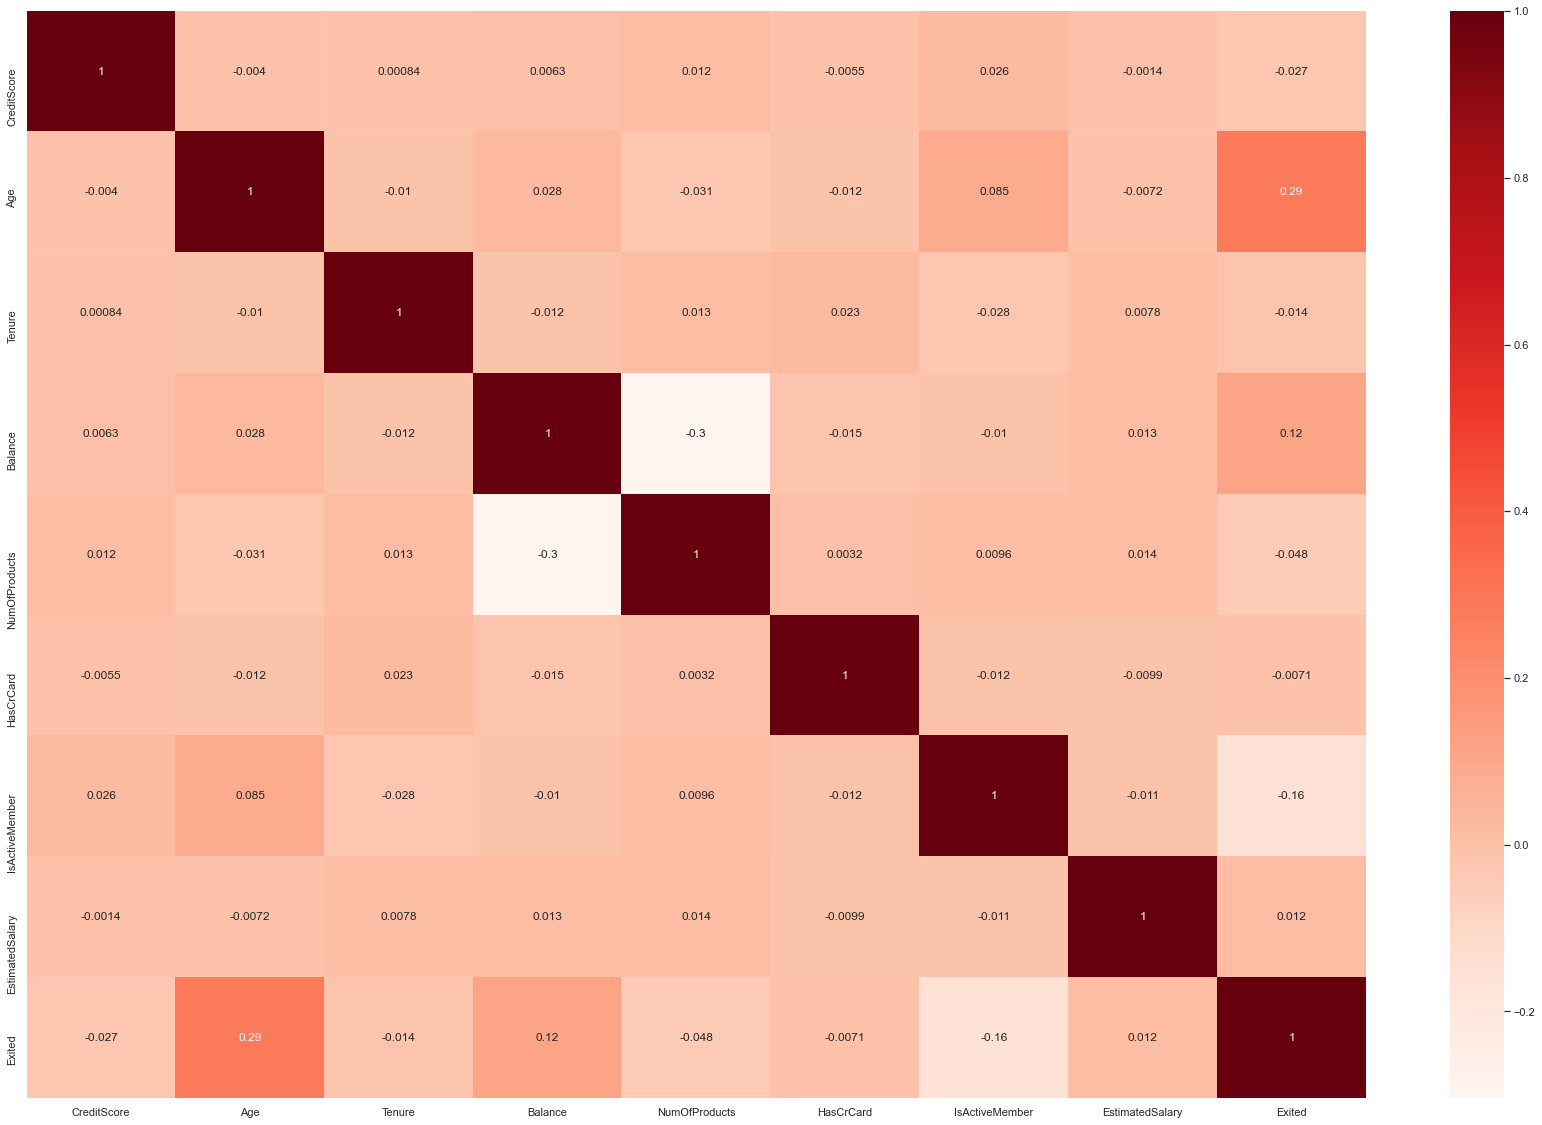

In [8]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
y = df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
X = df.iloc[:,:-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
X_encoded = pd.get_dummies(X, columns=['Geography','Gender'])

In [12]:
X_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [13]:
y.unique()

array([1, 0], dtype=int64)

In [14]:
sum(y)/len(y)

0.2037

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, stratify = y)

In [16]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42)
clf_xgb.fit(X_train,
            y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.68647
[1]	validation_0-aucpr:0.70185
[2]	validation_0-aucpr:0.70620
[3]	validation_0-aucpr:0.70798
[4]	validation_0-aucpr:0.71238
[5]	validation_0-aucpr:0.71755
[6]	validation_0-aucpr:0.71904
[7]	validation_0-aucpr:0.71879
[8]	validation_0-aucpr:0.71951
[9]	validation_0-aucpr:0.72071
[10]	validation_0-aucpr:0.72159
[11]	validation_0-aucpr:0.71881
[12]	validation_0-aucpr:0.72091
[13]	validation_0-aucpr:0.72276
[14]	validation_0-aucpr:0.72348


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15]	validation_0-aucpr:0.72443
[16]	validation_0-aucpr:0.72564
[17]	validation_0-aucpr:0.72603
[18]	validation_0-aucpr:0.72458
[19]	validation_0-aucpr:0.72494
[20]	validation_0-aucpr:0.72437
[21]	validation_0-aucpr:0.72379
[22]	validation_0-aucpr:0.72373
[23]	validation_0-aucpr:0.72308
[24]	validation_0-aucpr:0.72220
[25]	validation_0-aucpr:0.72122
[26]	validation_0-aucpr:0.72119
[27]	validation_0-aucpr:0.71991


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [17]:
#Otimizando os hyperparametros



#Rodada 1 
param_grid = {
    'max_depth':[3, 4, 5],
    'learning_rate':[0.1, 0.01, 0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]
}
#Resultados obtidos - {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 0, 'scale_pos_weight': 3}


optimal_params = GridSearchCV(
                    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                               seed=42,
                                               subsample=0.9,
                                               colsample_bytree=0.5),
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=0,
                    n_jobs=10,
                    cv=3)

In [18]:
optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test,y_test)],
                  verbose=False)
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 0, 'scale_pos_weight': 3}


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


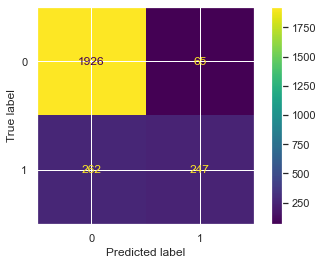

In [19]:
plot_confusion_matrix(clf_xgb,
                    X_test,
                     y_test)

In [20]:
1926/(1926+65)

0.9673530889000502

In [21]:
247/(247+262)

0.48526522593320237

In [22]:
clf_xgb2 = xgb.XGBClassifier(objective='binary:logistic', 
                             seed=42,
                             gamma=0.25,
                             learning_rate=0.1,
                             max_depth=4,
                             reg_lambda=0,
                             scale_pos_weight=3,
                             subsample=0.9,
                             colsample_bytree=0.5  
                            )

clf_xgb2.fit(X_train,
            y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.48597
[1]	validation_0-aucpr:0.68272
[2]	validation_0-aucpr:0.65770
[3]	validation_0-aucpr:0.68019
[4]	validation_0-aucpr:0.68617
[5]	validation_0-aucpr:0.68110
[6]	validation_0-aucpr:0.67849
[7]	validation_0-aucpr:0.67341
[8]	validation_0-aucpr:0.67005
[9]	validation_0-aucpr:0.66686
[10]	validation_0-aucpr:0.66859
[11]	validation_0-aucpr:0.66517
[12]	validation_0-aucpr:0.67911
[13]	validation_0-aucpr:0.68859
[14]	validation_0-aucpr:0.68538
[15]	validation_0-aucpr:0.68406
[16]	validation_0-aucpr:0.68290
[17]	validation_0-aucpr:0.68053
[18]	validation_0-aucpr:0.67993
[19]	validation_0-aucpr:0.68787
[20]	validation_0-aucpr:0.69336
[21]	validation_0-aucpr:0.69280


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-aucpr:0.70142
[23]	validation_0-aucpr:0.70030
[24]	validation_0-aucpr:0.70318
[25]	validation_0-aucpr:0.70378
[26]	validation_0-aucpr:0.71005
[27]	validation_0-aucpr:0.71530
[28]	validation_0-aucpr:0.71523
[29]	validation_0-aucpr:0.71534
[30]	validation_0-aucpr:0.71405
[31]	validation_0-aucpr:0.71328
[32]	validation_0-aucpr:0.71840
[33]	validation_0-aucpr:0.71961
[34]	validation_0-aucpr:0.72348
[35]	validation_0-aucpr:0.72551
[36]	validation_0-aucpr:0.72748
[37]	validation_0-aucpr:0.72803
[38]	validation_0-aucpr:0.72640
[39]	validation_0-aucpr:0.72621
[40]	validation_0-aucpr:0.72620
[41]	validation_0-aucpr:0.72615
[42]	validation_0-aucpr:0.72694
[43]	validation_0-aucpr:0.72688
[44]	validation_0-aucpr:0.72698
[45]	validation_0-aucpr:0.72688
[46]	validation_0-aucpr:0.72692


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=0, scale_pos_weight=3,
              seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

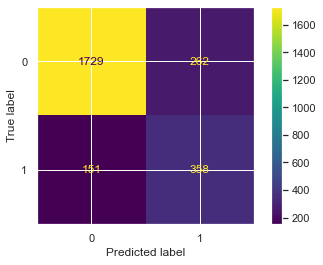

In [23]:
plot_confusion_matrix(clf_xgb2,
                    X_test,
                     y_test)

In [24]:
358/(358+151)


0.7033398821218074

In [25]:
######################################################################################################

In [26]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_encoded, y, random_state = 42, train_size=0.8 , shuffle=True)

In [27]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
x_train_smote,y_train_smote = SMOTE.fit_resample(X_train_2,y_train_2)

In [28]:
X_train_3,X_test_3,Y_train_3,Y_test_3 = train_test_split(x_train_smote, y_train_smote,random_state=42, train_size=0.8 , shuffle=True,)

In [29]:
xgb_2 = XGBClassifier(objective='binary:logistic', 
                             seed=42,
                             gamma=0.25,
                             learning_rate=0.1,
                             max_depth=4,
                             reg_lambda=0,
                             scale_pos_weight=3,
                             subsample=0.9,
                             colsample_bytree=0.5)

In [30]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler 
steps = [('under', RandomUnderSampler()), ('model',xgb_2)]
pipeline = Pipeline(steps=steps)

In [31]:
pipeline.fit(X_train_3,Y_train_3)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:23:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('under', RandomUnderSampler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, enable_categorical=False,
                               gamma=0.25, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=6, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=0,
                               scale_pos_weight=3, seed=42, subsample=0.9,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))]

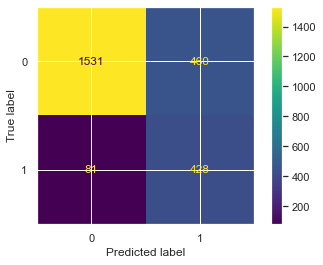

In [32]:
plot_confusion_matrix(xgb_2,
                    X_test,
                     y_test)

In [34]:
428/(428+81)

0.8408644400785854